<a href="https://colab.research.google.com/github/nidhithakare1207/BML/blob/main/Experiment_No_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 06: SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart (1).csv to heart (1).csv


In [ ]:
import io
filename = list(uploaded.keys())[0]
print("Using file:", filename)

df = pd.read_csv(io.BytesIO(uploaded[filename]))


Using file: heart (1).csv


In [ ]:
print("First 5 rows of dataset:")
print(df.head())

print("\nShape of dataset:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nCheck for missing values:")
print(df.isnull().sum())


First 5 rows of dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Shape of dataset: (1025, 14)

Columns:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Check for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldp

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (1025, 13)
Target vector shape: (1025,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 820
Test set size: 205


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_model.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy of SVM model: {:.2f}%".format(acc * 100))

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of SVM model: 92.68%

Confusion Matrix:
[[91  9]
 [ 6 99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



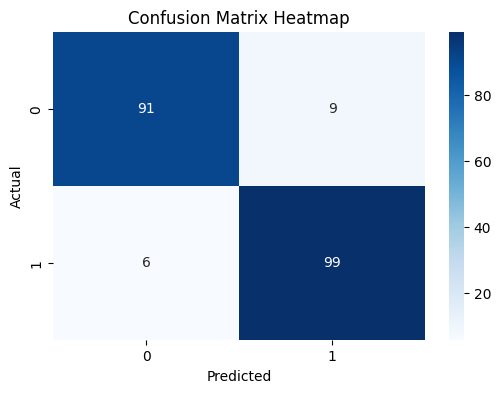

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

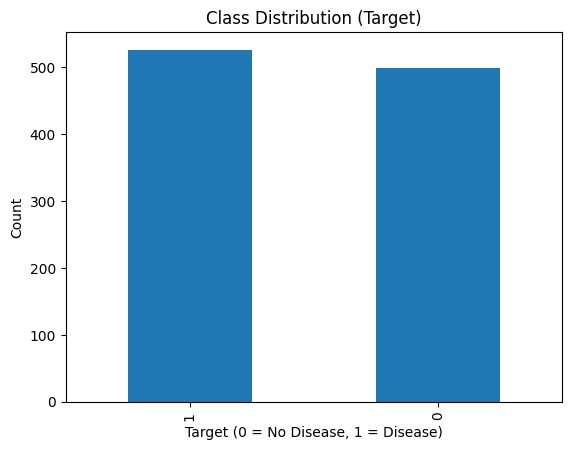

In [ ]:
plt.figure()
df['target'].value_counts().plot(kind='bar')
plt.title('Class Distribution (Target)')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()
